# LAB 7: Neural Networks

# Question 1: Implementing Neural Network using Pytorch

#### Importing the libraries

In [4]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import numpy as np
from sklearn.utils import shuffle 
from torchsummary import summary
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

#### loading the dataset

In [6]:
col = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
data = pd.read_csv(r'C:\Users\Kartik\Desktop\Lab 7\1\abalone.data', names=col)

In [7]:
data

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### Encoding the data

In [8]:
def encoding(columnName):
    label_encoder = LabelEncoder()
    data[columnName] = label_encoder.fit_transform(data[columnName])

In [10]:
encoding('Sex')
data

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
data.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
col.remove('Sex')
col.remove('Rings')

C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

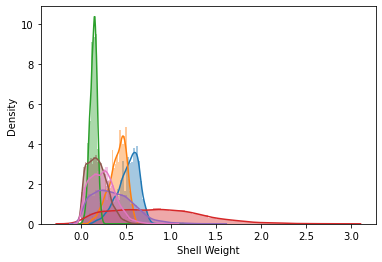

In [14]:
def plotNormal(data):
    for i in col:
        sns.distplot(data[i])
        
plotNormal(data)

#### normalising the data

In [15]:
dataf=((data-data.min())/(data.max()-data.min()))*20
data = dataf

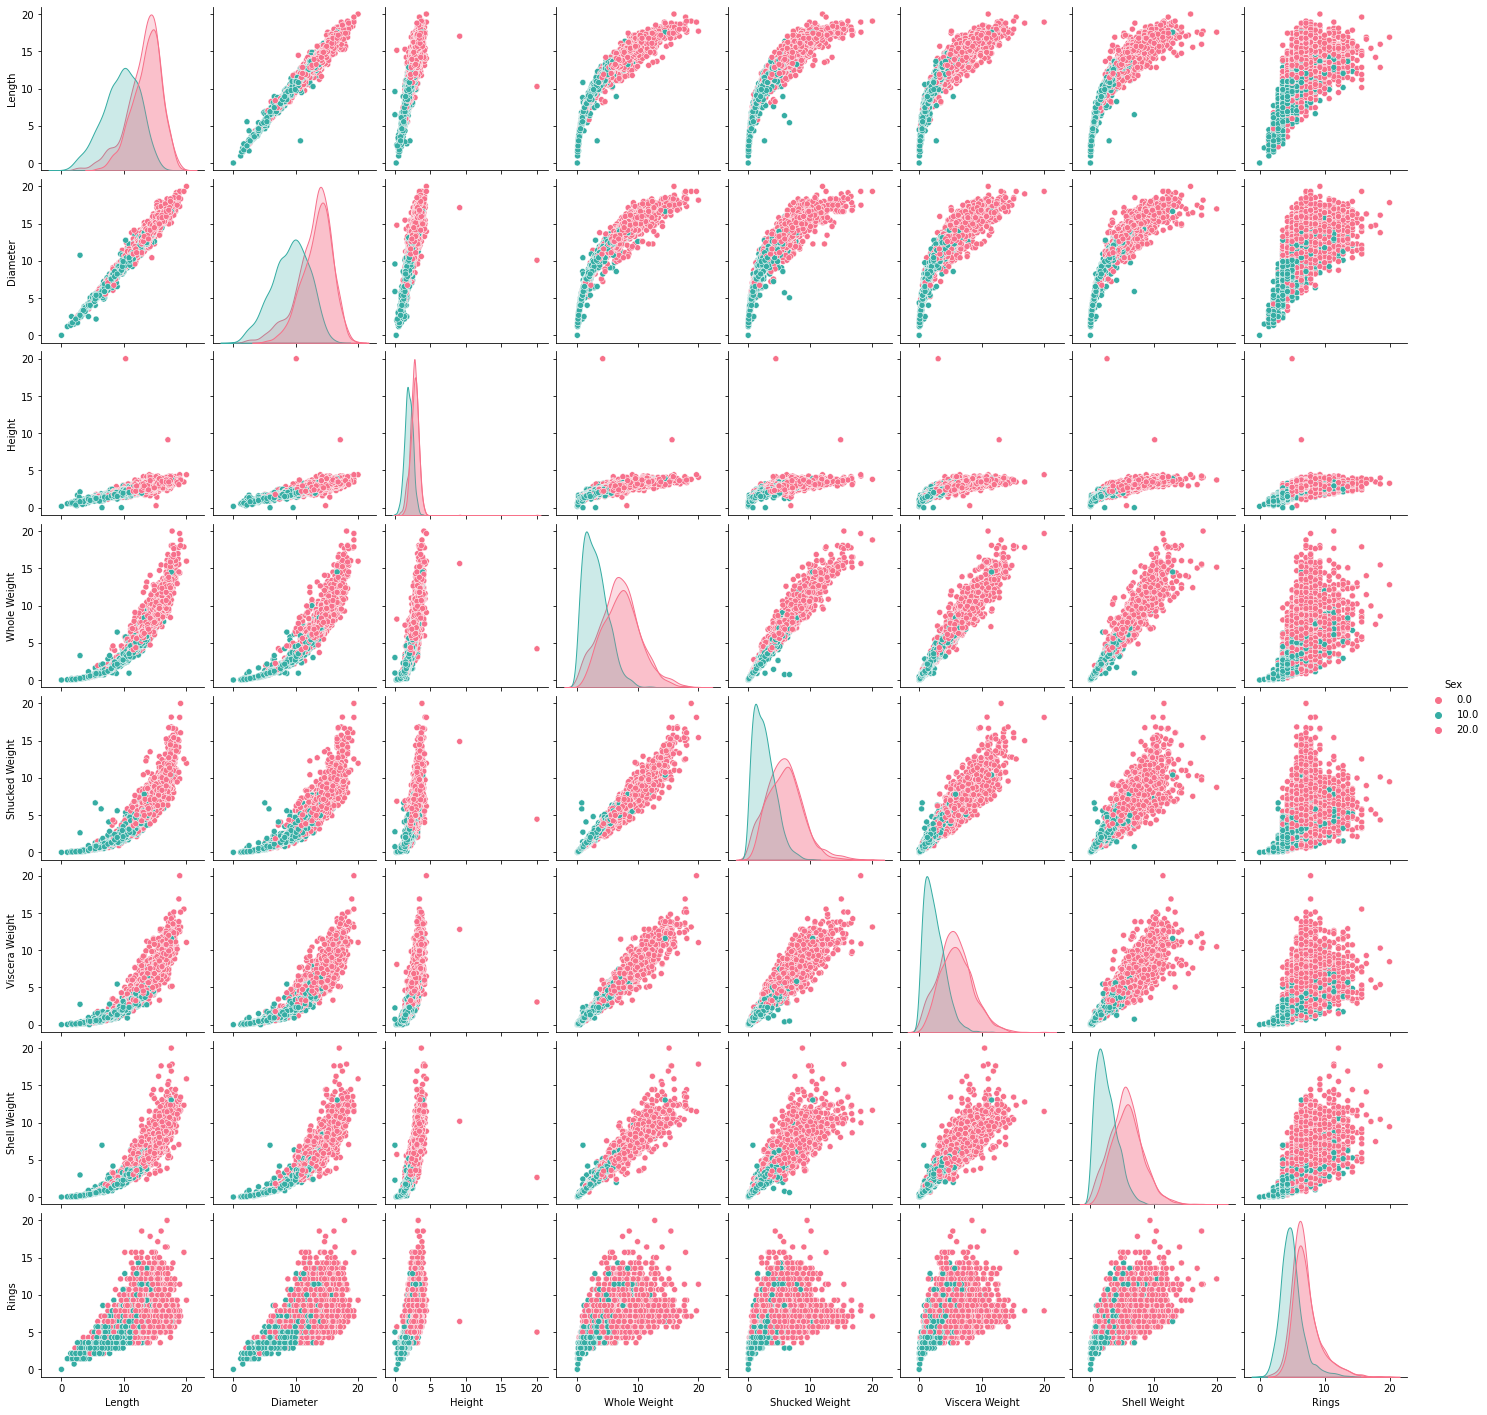

In [18]:
sns.pairplot(data, hue='Sex', palette = 'husl')

In [19]:
X = data.iloc[:, 0:8]
y = data.loc[:, 'Rings']

In [20]:
X_train,X_test,y_train,y_test = tts(X,y,train_size = 0.8,random_state=43)
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values 

#### setting the device

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [22]:
batch_size = 32
num_epochs = 500
learning_rate = 0.01
size_hidden1 = 8
size_hidden2 = 8
num_classes = 30
batch_no = len(X_train) // batch_size
cols = X_train.shape[1]

#### Creating the Neural Network Class

In [24]:
#NN

class NN(nn.Module):
  def __init__(self,num_inputs,size_hidden_1,size_hidden_2,output):
    super(NN,self).__init__()
    self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)
    self.activation_1 = torch.nn.Tanh()
    self.hidden_layer_2 = torch.nn.Linear(size_hidden_1,size_hidden_2)
    self.activation_2 = torch.nn.Tanh()

    self.output_layer = torch.nn.Linear(size_hidden_2, output) 
    self.output_activation = torch.nn.Softmax(dim = 1)

  def forward(self,x):
    x1 = self.activation_1(self.hidden_layer_1(x))  
    y1 = self.activation_2(self.hidden_layer_2(x)) 
    o = self.output_activation(self.output_layer(x1 + y1)) 
    return o

net = NN(cols, size_hidden1, size_hidden2, num_classes)
summary(net, (1, 8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              72
              Tanh-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 8]              72
              Tanh-4                 [-1, 1, 8]               0
            Linear-5                [-1, 1, 30]             270
           Softmax-6                [-1, 1, 30]               0
Total params: 414
Trainable params: 414
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


#### Creating the optimiezr function and lossfunction

In [25]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = torch.nn.CrossEntropyLoss()  

#### Accuracy function

In [26]:
def get_accuracy(logit,target,batch_size):
  corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
  accuracy = 100.0 * corrects/batch_size
  return accuracy.item()

#### Running for the Epochs

In [86]:
for epoch in range(num_epochs):
    X_train, y_train = shuffle(X_train, y_train)
    
    train_acc = 0.0
    test_acc = 0.0
    running_loss = 0.0
    
    for i in range(batch_no):
        start = i*batch_size
        end = start+batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.LongTensor(y_train[start:end]))
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #statistiics
        running_loss += loss.item()
        acc = get_accuracy(outputs, labels, batch_size)
        train_acc += acc
        
        inputst = Variable(torch.FloatTensor(X_test[start:end]))
        labelst = Variable(torch.LongTensor(y_test[start:end]))
        outputst = net(inputst)
        acct = get_accuracy(outputst, labelst, batch_size)
        test_acc += acct
    print('Epoch: %d ||| Loss: %.5f ||| Train Accuracy: %.2f ||| Test Accuracy : %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1), test_acc/(i+1)))  
    running_loss = 0.0

Epoch: 1 ||| Loss: 3.26277 ||| Train Accuracy: 19.38 ||| Test Accuracy : 20.22
Epoch: 2 ||| Loss: 3.26185 ||| Train Accuracy: 19.47 ||| Test Accuracy : 20.22
Epoch: 3 ||| Loss: 3.25962 ||| Train Accuracy: 19.68 ||| Test Accuracy : 20.22
Epoch: 4 ||| Loss: 3.26497 ||| Train Accuracy: 19.14 ||| Test Accuracy : 20.22
Epoch: 5 ||| Loss: 3.25813 ||| Train Accuracy: 19.80 ||| Test Accuracy : 20.22
Epoch: 6 ||| Loss: 3.27497 ||| Train Accuracy: 18.09 ||| Test Accuracy : 20.22
Epoch: 7 ||| Loss: 3.26327 ||| Train Accuracy: 19.23 ||| Test Accuracy : 20.22
Epoch: 8 ||| Loss: 3.26327 ||| Train Accuracy: 19.11 ||| Test Accuracy : 20.22
Epoch: 9 ||| Loss: 3.27037 ||| Train Accuracy: 18.06 ||| Test Accuracy : 20.22
Epoch: 10 ||| Loss: 3.26387 ||| Train Accuracy: 18.45 ||| Test Accuracy : 20.25
Epoch: 11 ||| Loss: 3.20148 ||| Train Accuracy: 27.88 ||| Test Accuracy : 29.78
Epoch: 12 ||| Loss: 3.17697 ||| Train Accuracy: 30.41 ||| Test Accuracy : 31.94
Epoch: 13 ||| Loss: 3.17553 ||| Train Accuracy: 2

Epoch: 104 ||| Loss: 2.92511 ||| Train Accuracy: 53.85 ||| Test Accuracy : 54.69
Epoch: 105 ||| Loss: 2.94871 ||| Train Accuracy: 51.29 ||| Test Accuracy : 54.63
Epoch: 106 ||| Loss: 2.93108 ||| Train Accuracy: 53.09 ||| Test Accuracy : 54.75
Epoch: 107 ||| Loss: 2.93227 ||| Train Accuracy: 52.94 ||| Test Accuracy : 54.72
Epoch: 108 ||| Loss: 2.93900 ||| Train Accuracy: 52.28 ||| Test Accuracy : 54.78
Epoch: 109 ||| Loss: 2.92607 ||| Train Accuracy: 53.67 ||| Test Accuracy : 54.81
Epoch: 110 ||| Loss: 2.93870 ||| Train Accuracy: 52.49 ||| Test Accuracy : 54.78
Epoch: 111 ||| Loss: 2.94215 ||| Train Accuracy: 51.95 ||| Test Accuracy : 54.54
Epoch: 112 ||| Loss: 2.92563 ||| Train Accuracy: 53.64 ||| Test Accuracy : 54.69
Epoch: 113 ||| Loss: 2.93097 ||| Train Accuracy: 53.22 ||| Test Accuracy : 54.99
Epoch: 114 ||| Loss: 2.94642 ||| Train Accuracy: 51.80 ||| Test Accuracy : 54.72
Epoch: 115 ||| Loss: 2.94856 ||| Train Accuracy: 51.26 ||| Test Accuracy : 54.66
Epoch: 116 ||| Loss: 2.94091

Epoch: 207 ||| Loss: 2.93272 ||| Train Accuracy: 52.73 ||| Test Accuracy : 54.48
Epoch: 208 ||| Loss: 2.93549 ||| Train Accuracy: 52.22 ||| Test Accuracy : 54.96
Epoch: 209 ||| Loss: 2.93234 ||| Train Accuracy: 52.52 ||| Test Accuracy : 54.81
Epoch: 210 ||| Loss: 2.94087 ||| Train Accuracy: 51.95 ||| Test Accuracy : 54.66
Epoch: 211 ||| Loss: 2.93259 ||| Train Accuracy: 52.73 ||| Test Accuracy : 54.75
Epoch: 212 ||| Loss: 2.93195 ||| Train Accuracy: 52.76 ||| Test Accuracy : 54.90
Epoch: 213 ||| Loss: 2.93438 ||| Train Accuracy: 52.40 ||| Test Accuracy : 54.87
Epoch: 214 ||| Loss: 2.93696 ||| Train Accuracy: 52.28 ||| Test Accuracy : 54.93
Epoch: 215 ||| Loss: 2.93082 ||| Train Accuracy: 52.73 ||| Test Accuracy : 54.60
Epoch: 216 ||| Loss: 2.92704 ||| Train Accuracy: 53.16 ||| Test Accuracy : 54.87
Epoch: 217 ||| Loss: 2.92513 ||| Train Accuracy: 53.49 ||| Test Accuracy : 54.57
Epoch: 218 ||| Loss: 2.93464 ||| Train Accuracy: 52.55 ||| Test Accuracy : 54.84
Epoch: 219 ||| Loss: 2.92713

Epoch: 310 ||| Loss: 2.93293 ||| Train Accuracy: 52.55 ||| Test Accuracy : 54.78
Epoch: 311 ||| Loss: 2.93427 ||| Train Accuracy: 52.40 ||| Test Accuracy : 54.42
Epoch: 312 ||| Loss: 2.93799 ||| Train Accuracy: 51.92 ||| Test Accuracy : 54.42
Epoch: 313 ||| Loss: 2.94243 ||| Train Accuracy: 51.47 ||| Test Accuracy : 54.72
Epoch: 314 ||| Loss: 2.92746 ||| Train Accuracy: 53.03 ||| Test Accuracy : 54.81
Epoch: 315 ||| Loss: 2.92022 ||| Train Accuracy: 53.73 ||| Test Accuracy : 54.75
Epoch: 316 ||| Loss: 2.92761 ||| Train Accuracy: 52.97 ||| Test Accuracy : 54.48
Epoch: 317 ||| Loss: 2.92876 ||| Train Accuracy: 52.97 ||| Test Accuracy : 54.87
Epoch: 318 ||| Loss: 2.92476 ||| Train Accuracy: 53.31 ||| Test Accuracy : 54.75
Epoch: 319 ||| Loss: 2.94205 ||| Train Accuracy: 51.50 ||| Test Accuracy : 54.66
Epoch: 320 ||| Loss: 2.92893 ||| Train Accuracy: 52.88 ||| Test Accuracy : 54.72
Epoch: 321 ||| Loss: 2.91647 ||| Train Accuracy: 54.06 ||| Test Accuracy : 54.90
Epoch: 322 ||| Loss: 2.92729

Epoch: 413 ||| Loss: 2.92042 ||| Train Accuracy: 53.88 ||| Test Accuracy : 54.78
Epoch: 414 ||| Loss: 2.93199 ||| Train Accuracy: 52.46 ||| Test Accuracy : 54.84
Epoch: 415 ||| Loss: 2.92520 ||| Train Accuracy: 53.31 ||| Test Accuracy : 54.75
Epoch: 416 ||| Loss: 2.92640 ||| Train Accuracy: 53.12 ||| Test Accuracy : 54.72
Epoch: 417 ||| Loss: 2.91644 ||| Train Accuracy: 54.09 ||| Test Accuracy : 54.66
Epoch: 418 ||| Loss: 2.93745 ||| Train Accuracy: 51.83 ||| Test Accuracy : 54.93
Epoch: 419 ||| Loss: 2.93975 ||| Train Accuracy: 51.71 ||| Test Accuracy : 54.81
Epoch: 420 ||| Loss: 2.93685 ||| Train Accuracy: 52.13 ||| Test Accuracy : 54.84
Epoch: 421 ||| Loss: 2.92917 ||| Train Accuracy: 52.73 ||| Test Accuracy : 54.66
Epoch: 422 ||| Loss: 2.93702 ||| Train Accuracy: 51.95 ||| Test Accuracy : 54.72
Epoch: 423 ||| Loss: 2.92819 ||| Train Accuracy: 53.00 ||| Test Accuracy : 54.81
Epoch: 424 ||| Loss: 2.93821 ||| Train Accuracy: 51.80 ||| Test Accuracy : 54.51
Epoch: 425 ||| Loss: 2.92748

# Question 2

In [63]:
df = pd.read_excel(r'C:\Users\Kartik\Desktop\Lab 7\DryBeanDataset\Dry_Bean_Dataset.xlsx')

In [64]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


#### Encoding the Classes

In [65]:
def encoding(columnName):
  label_encoder = LabelEncoder()
  df[columnName] = label_encoder.fit_transform(df[columnName])

encoding('Class')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


#### Separating the necessary features

In [66]:
reqFeat = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','roundness','Class']
df = df[reqFeat]
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,roundness,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,0.958027,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,0.887034,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,0.947849,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,0.903936,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,0.984877,5
...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,0.916603,3
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,0.922015,3
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,0.918424,3
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,0.907906,3


#### performing the normalisation on the dataset

In [69]:
def normalize(dataset):
  dataNorm = ((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
  dataNorm['Class'] = dataset['Class']
  return dataNorm

In [70]:
df = normalize(df)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,roundness,Class
0,0.681053,1.171478,0.885243,3.042834,2.452242,9.555941,0.662140,18.696451,5
1,0.710004,1.551135,0.609576,3.566733,1.031548,5.569440,0.699819,15.862760,5
2,0.765171,1.360697,1.052661,3.163798,2.630425,9.928956,0.742527,18.290212,5
3,0.818801,1.658841,0.970964,3.553828,1.832459,8.077289,0.827778,16.537429,5
4,0.830074,1.306255,0.657233,4.013590,0.511305,3.313591,0.802467,19.768162,5
...,...,...,...,...,...,...,...,...,...
13606,1.851184,3.217233,3.786357,3.756868,7.511686,15.771069,1.799346,17.043020,3
13607,1.851526,3.187150,3.528992,4.039286,6.426061,14.924825,1.798192,17.259048,3
13608,1.854771,3.212098,3.527679,4.067409,6.371165,14.877533,1.804376,17.115704,3
13609,1.855454,3.273140,3.594052,4.013380,6.609446,15.079418,1.812455,16.695894,3


C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

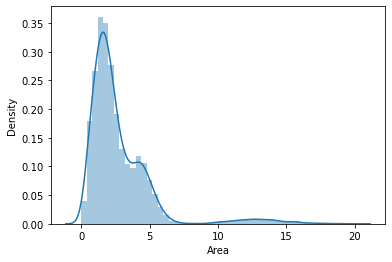

In [71]:
sns.distplot(df['Area'])

In [72]:
len(np.unique(df['Class']))

7

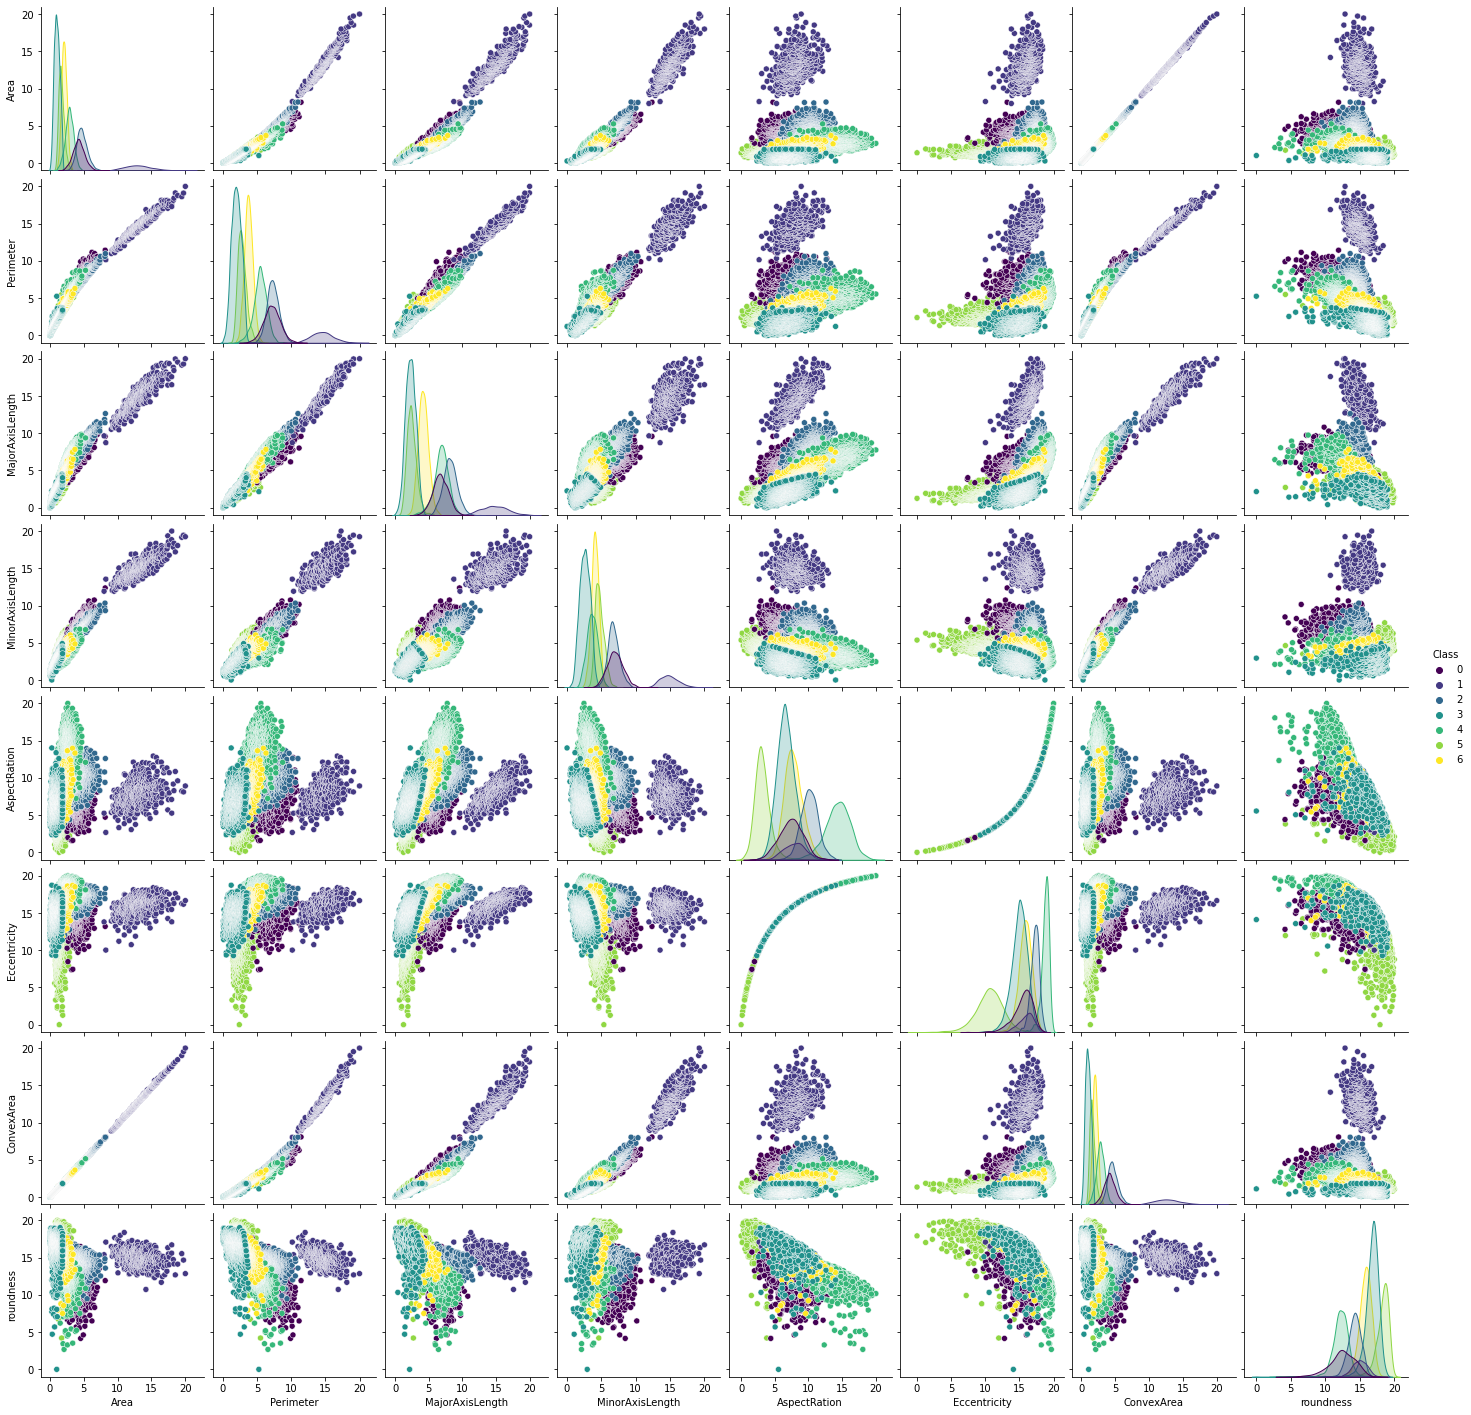

In [73]:
sns.pairplot(df,hue = 'Class',palette = 'viridis')

In [74]:
X = df.iloc[:,0:8]
y = df.loc[:,'Class']
X_train,X_test,y_train,y_test = tts(X,y,train_size = 0.7,random_state=0)
#change to numpy 
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values 


In [75]:
X_train.shape

(9527, 8)

In [76]:
X_test[0]

array([ 1.43956344,  2.53940412,  2.92435338,  3.39343624,  6.37173807,
       14.87802863,  1.40161681, 17.52779337])

In [77]:
y_test[0]

3

In [78]:
from math import exp

#### implementing multi-layer perceptron 
##### 1. Writing activation functions, 2. Forward propagate the input, 3. Backward Propagate the error, 4. Training the network using stochastic gradient descent, 5. Predict the output for a given test sample and compute the accuracy.

In [79]:
#part b and c
class NeuralNetwork:
  def __init__(self,X,y):
    self.m , self.n = X.shape
    self.lambd = 1e-3
    self.learning_rate = 0.1

    self.h1 = 12
    self.h2 = 3
    self.h3 = 7

  def init_kaiming_weights(self,l0,l1):
     #random weights
     w = np.random.randn(l0, l1) * np.sqrt(2.0 / l0)
     #zero weights
     #w = np.zeros((l0,l1))
     #constant
     #w = np.full((l0,l1),0.007)
     b = np.zeros((1,l1))
     return w,b
  def sigmoid(x):
    return 1.0 / (1.0 + exp(-x))
  def forward_prop(self,X,parameters):
    W3 = parameters['W3']#hl2 to hl3
    W2 = parameters['W2']#hl1 to hl2
    W1 = parameters['W1']#i/p to hl1
    b3 = parameters['b3']#bias 3
    b2 = parameters['b2']# bias 2
    b1 = parameters['b1']# bias 1

    #forward prop
    a0 = X
    z1 = np.dot(a0,W1) + b1
    #relu
    a1 = np.maximum(0,z1)
    #lineear
    #a1 = z1
    #tanh
    #a1 = (exp(z1) - exp(-z1)) / (exp(z1) + exp(-z1))
    #sigmoid
    #a1 = [self.sigmoid(x) for x in z1]
    z2 = np.dot(a1,W2) + b2
    #relu
    a2 = np.maximum(0,z2)
    #tanh
    #a2 = (exp(z2) - exp(-z2)) / (exp(z2) + exp(-z2))
    #linear
    #a2 = z2
    #sigmoid
    #a2 = [self.sigmoid(z2) for x in z2]
    z3 = np.dot(a2,W3) + b3

    #softmax
    scores = z3
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    cache = {
        'a0' : X,
        'probs' : probs,
        'a1' : a1,
        'a2' : a2
    }

    return cache, probs

  def loss(self,y,probs,parameters):
    W3 = parameters['W3']#hl2 to hl3
    W2 = parameters['W2']#hl1 to hl2
    W1 = parameters['W1']#i/p to hl1
    y = y.astype(int)
    data_loss = np.sum(-np.log(probs[np.arange(self.m), y]) / self.m)
    reg_loss = 0.5 * self.lambd * np.sum(W1 * W1) + 0.5 * self.lambd * np.sum(W2 * W2) + 0.5 * self.lambd * np.sum(W3 * W3)

    total_loss = data_loss + reg_loss
    return total_loss

  def back_prop(self,cache,parameters,y):
    #unpacking parameters
    W3 = parameters['W3']#hl2 to hl3
    W2 = parameters['W2']#hl1 to hl2
    W1 = parameters['W1']#i/p to hl1
    b3 = parameters['b3']#bias 3
    b2 = parameters['b2']# bias 2
    b1 = parameters['b1']# bias 1

    #unpacking from cache
    a0 = cache["a0"]
    a1 = cache["a1"]
    a2 = cache["a2"]
    probs = cache["probs"]
    
    dz3 = probs
    dz3[np.arange(self.m), y] -= 1
    dz3 /= self.m

    #dw3 and db3
    dW3 = np.dot(a2.T,dz3) + self.lambd*W3
    db3 =  np.sum(dz3, axis=0, keepdims=True)

    dz2 = np.dot(dz3,W3.T)
    dz2 = dz2 * (a2 > 0)
    
    dW2 = np.dot(a1.T, dz2) + self.lambd * W2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = np.dot(dz2, W2.T)
    dz1 = dz1 * (a1 > 0)

    # backprop through values dW1, db1
    dW1 = np.dot(a0.T, dz1) + self.lambd * W1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    grads = {
             "dW1": dW1, 
             "dW2": dW2, 
             "dW3" : dW3,
             "db1": db1, 
             "db2": db2, 
             "db3" : db3
            }

    return grads
    

  def update_parameters(self,parameters,grads):
    learning_rate = self.learning_rate

    #unpacking parameters
    W3 = parameters['W3']#hl2 to hl3
    W2 = parameters['W2']#hl1 to hl2
    W1 = parameters['W1']#i/p to hl1
    b3 = parameters['b3']#bias 3
    b2 = parameters['b2']# bias 2
    b1 = parameters['b1']# bias 1

    dW1 = grads['dW1']
    dW2 = grads['dW2']
    dW3 = grads['dW3']
    db1 = grads['db1']
    db2 = grads['db2']
    db3 = grads['db3']

    W3 -= learning_rate * dW3
    W2 -= learning_rate * dW2
    W1 -= learning_rate * dW1
    b3 -= learning_rate * db3
    b2 -= learning_rate * db2
    b1 -= learning_rate * db1

    parameters = {
        "W3" : W3,
        "W2" : W2,
        "W1" : W1,
        "b3" : b3,
        "b2" : b2,
        "b1" : b1
    }

    return parameters


  def main(self, X,y,num_iter = 500):
    W1 , b1 = self.init_kaiming_weights(self.n, self.h1)
    W2, b2 = self.init_kaiming_weights(self.h1, self.h2)
    W3, b3 = self.init_kaiming_weights(self.h2, self.h3)

    parameters = {
        "W3" : W3,
        "W2" : W2,
        "W1" : W1,
        "b3" : b3,
        "b2" : b2,
        "b1" : b1
    }

    for it in range(num_iter + 1):
      cache, probs = self.forward_prop(X, parameters)
      loss = self.loss(y, probs, parameters)
      if it % 100 == 0:
        print(f"At iteration {it} we have a loss of {loss}")
      grads = self.back_prop(cache, parameters, y)
      parameters = self.update_parameters(parameters, grads)
    
    return parameters

  def predict(self,X,parameters):
    cache, probs = self.forward_prop(X,parameters)
    #print("Predicted Class is : ")
    #print(np.argmax(probs)+1)
    return np.argmax(probs) + 1

print("Success !!!")

Success !!!


In [80]:
from sklearn.metrics import accuracy_score 
# def get_accuracy(logit,target,batch_size = 9527 ):
#     corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
#     accuracy = 100.0 * corrects/batch_size
#     return accuracy.item()

if __name__ == "__main__":
  X,y = X_train,y_train
  y = y.astype(int)
  NN = NeuralNetwork(X, y)
  trained_parameters = NN.main(X, y)
  #y_pred = NN.predict([ 1.43956344,  2.53940412,  2.92435338,  3.39343624,  6.37173807,14.87802863,  1.40161681, 17.52779337],trained_parameters)
  y_pred = []
  for i in X_train:
    temp = NN.predict(i,trained_parameters)
    y_pred.append(temp)
  # y_pred1 = torch.Tensor(y_pred)
  # y_train1 = torch.Tensor(y_train)
  #print(y_pred1,y_train1)
  #acc = get_accuracy(y_pred1,y_train1)
  acc = accuracy_score(y_train,y_pred)
  print("Training Accuracy : ",str(100*acc) + "%")
#print(trained_parameters)

y_pred = []
for i in X_test:
  temp = NN.predict(i,trained_parameters)
  y_pred.append(temp)
acc1 = accuracy_score(y_test,y_pred)
print("Testing Accuracy : ",str(100*acc1) + "%")

At iteration 0 we have a loss of 26.264260136077645
At iteration 100 we have a loss of 1.873617021201433
At iteration 200 we have a loss of 1.865031593217881
At iteration 300 we have a loss of 1.8627928460366139
At iteration 400 we have a loss of 1.8617728211934628
At iteration 500 we have a loss of 1.861115967214099
Training Accuracy :  14.002309226409155%
Testing Accuracy :  14.54456415279138%


In [81]:
#Experimenting with differnet activation fucntion by using comments
#similaryly for weight initialisation
#Changing the size of hidden layers best one will be input -> 12 -> 3 -> 7
#provision to save and load weights is trained_parameters

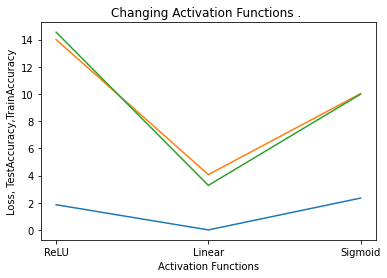

In [82]:
#activating function plots
#part c
Xaxis = ["ReLU", "Linear","Sigmoid"]

Yaxis1 = [1.855753944,0.004177462531,2.345234567]
Yaxis2 = [14.00230923,4.072635667,10.02823456]
Yaxis3 = [14.54456415,3.281096964,9.987806545]

import matplotlib.pyplot as plt
plt.plot(Xaxis,Yaxis1)
plt.plot(Xaxis,Yaxis2)
plt.plot(Xaxis,Yaxis3)
plt.xlabel("Activation Functions")
plt.ylabel("Loss, TestAccuracy,TrainAccuracy")
plt.title("Changing Activation Functions . ")
plt.show()

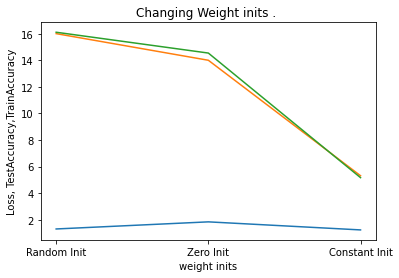

In [83]:
#Weight init plots
#part d

Xaxis = ["Random Init","Zero Init","Constant Init"]

Yaxis1 = [1.30320725,1.838317645,1.231821827]
Yaxis2 = [16.00713761,14.00230923,5.311220741]
Yaxis3 = [16.11165524,14.54456415,5.166503428]

import matplotlib.pyplot as plt
plt.plot(Xaxis,Yaxis1)
plt.plot(Xaxis,Yaxis2)
plt.plot(Xaxis,Yaxis3)
plt.xlabel("weight inits")
plt.ylabel("Loss, TestAccuracy,TrainAccuracy")
plt.title("Changing Weight inits . ")
plt.show()

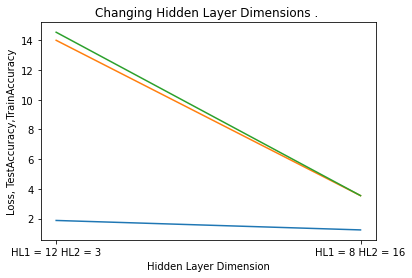

In [84]:
#part e

Xaxis = ["HL1 = 12 HL2 = 3" , "HL1 = 8 HL2 = 16"]

Yaxis1 = [1.878602351,1.242180123]
Yaxis2 = [14.00230923,3.547811483]
Yaxis3 = [14.54456415,3.550440744]

import matplotlib.pyplot as plt
plt.plot(Xaxis,Yaxis1)
plt.plot(Xaxis,Yaxis2)
plt.plot(Xaxis,Yaxis3)
plt.xlabel("Hidden Layer Dimension")
plt.ylabel("Loss, TestAccuracy,TrainAccuracy")
plt.title("Changing Hidden Layer Dimensions . ")
plt.show()

In [85]:
#part f
#saving and loading weights
import pickle

def saveweights(params):
  f = open("weights.pkl" , "wb")
  pickle.dump(params,f)
  f.close()

def loadweights():
  f = open("weights.pkl" , "rb")
  params = pickle.load(f)
  f.close()
  return params

#saving the weights in pickle file

saveweights(trained_parameters)


#loading weights in pickle file
trained_parameters = loadweights()
